In [1]:
# https://yt-project.org/
# Import the shiiiii

import yt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from FLASH_functions import *

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## First, let's just take a look at some slices of the data

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-08-05 21:07:56,055 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-08-05 21:07:56,093 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-08-05 21:07:56,093 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-08-05 21:07:56,094 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-08-05 21:07:56,094 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-08-05 21:07:56,095 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [3]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
# print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[288 272 288]
2


yt : [INFO     ] 2024-08-05 21:07:57,992 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:07:57,993 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:07:57,996 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:07:57,997 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:07:57,999 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [-0.5  0.5  0. ] code_length: [3.73015176e-05] code_mass/code_length**3



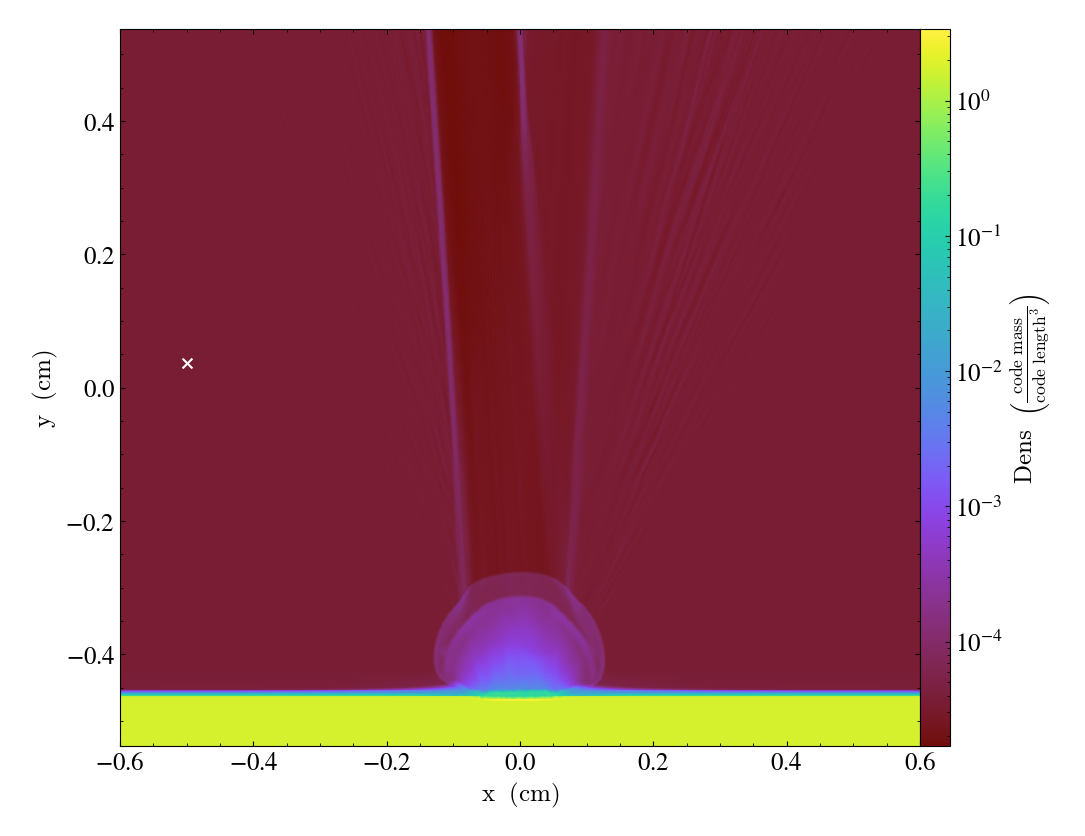

In [4]:
# Find some points in the background to pull values from

# background_pt = [0.3, 0.3, 0.0]
background_pt = [-0.5, 0.5, 0.0]

rho_0 = pull_value_at_coord(background_pt,'dens',ds)

# looks good

In [5]:
# perform appropriate conversions to get the number density of ions and electrons

def make_ion_number_density(field, data):
    avogadro = 6.022e23
    ion_number_density = avogadro*data["flash","dens"]*data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 6.022e23
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-08-05 21:08:00,360 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:00,361 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:00,365 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:00,366 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:00,367 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800


edens at [-0.6  0.7  0. ] code_length: [6.78910541e+18] code_mass/code_length**3



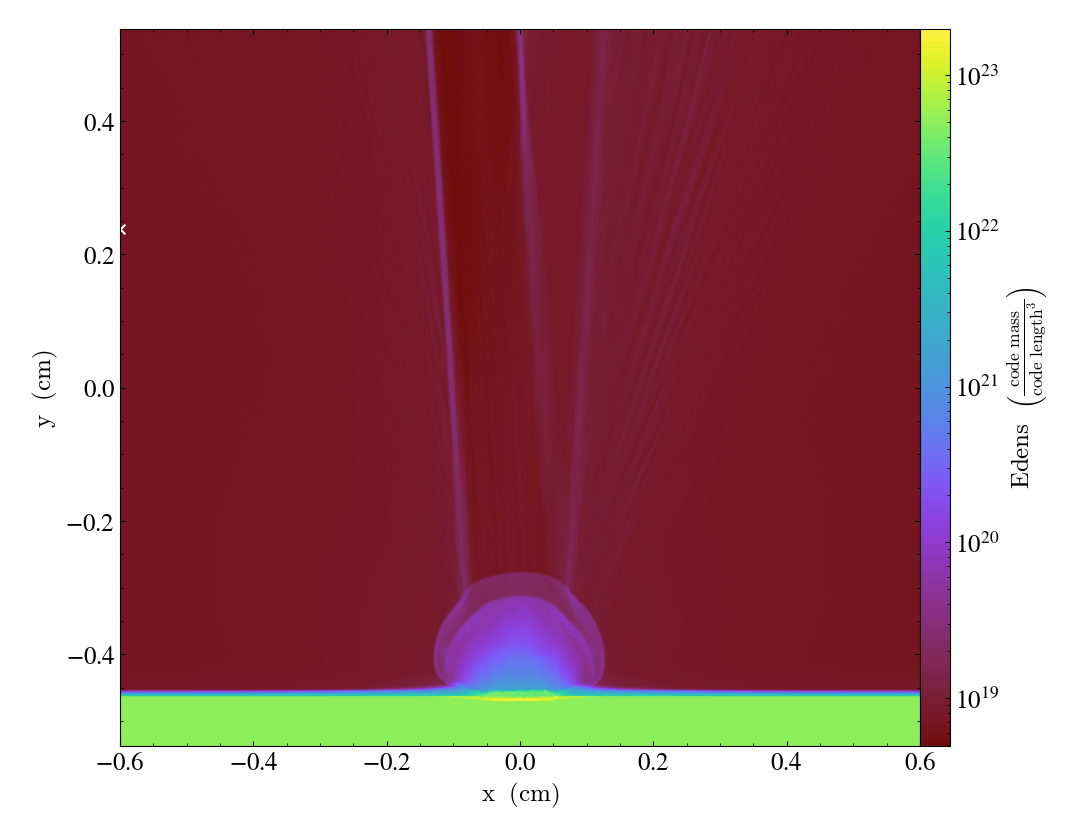

yt : [INFO     ] 2024-08-05 21:08:00,941 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:00,942 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:00,945 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:00,946 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:00,948 Making a fixed resolution buffer of (('flash', 'idens')) 800 by 800


idens at [-0.6  0.7  0. ] code_length: [8.32549275e+17] code_mass/code_length**3



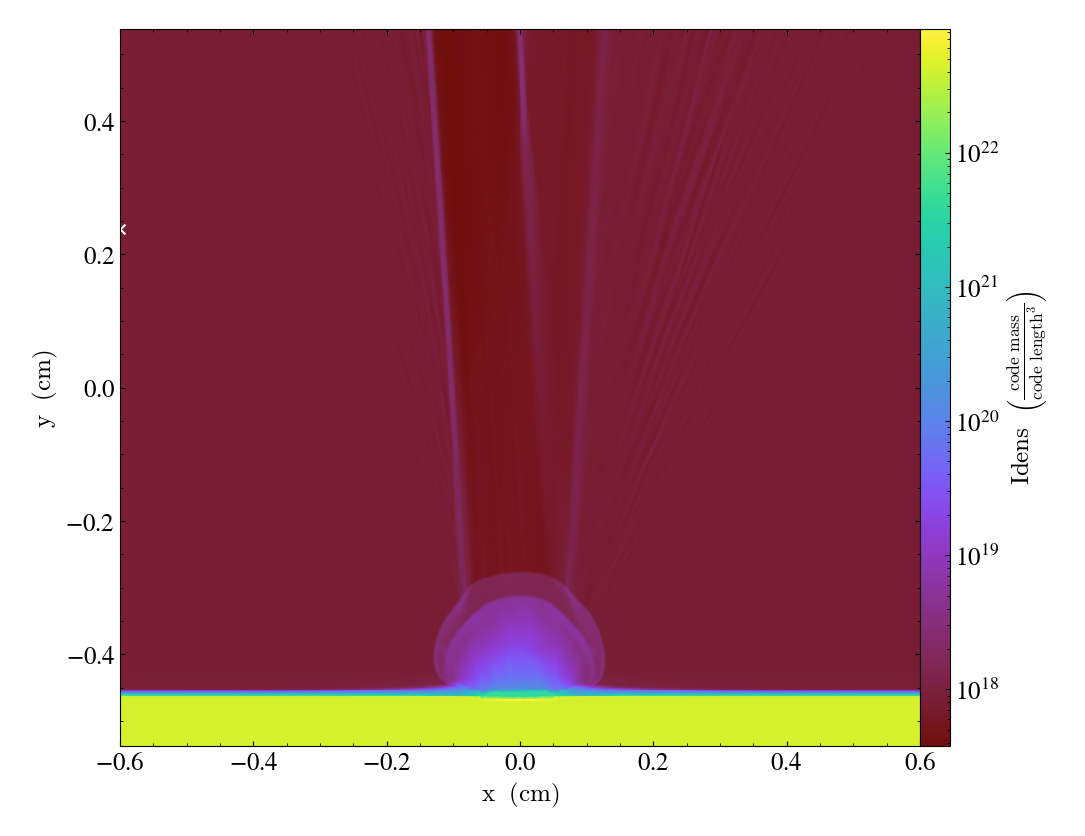

In [6]:
background_pt = [-0.6, 0.7, 0.0]

ne_0 = pull_value_at_coord(background_pt,'edens',ds)
ni_0 = pull_value_at_coord(background_pt,'idens',ds)


yt : [INFO     ] 2024-08-05 21:08:01,423 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:01,423 ylim = -0.197500 0.877500
yt : [INFO     ] 2024-08-05 21:08:01,426 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:01,427 ylim = -0.197500 0.877500
yt : [INFO     ] 2024-08-05 21:08:01,428 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800



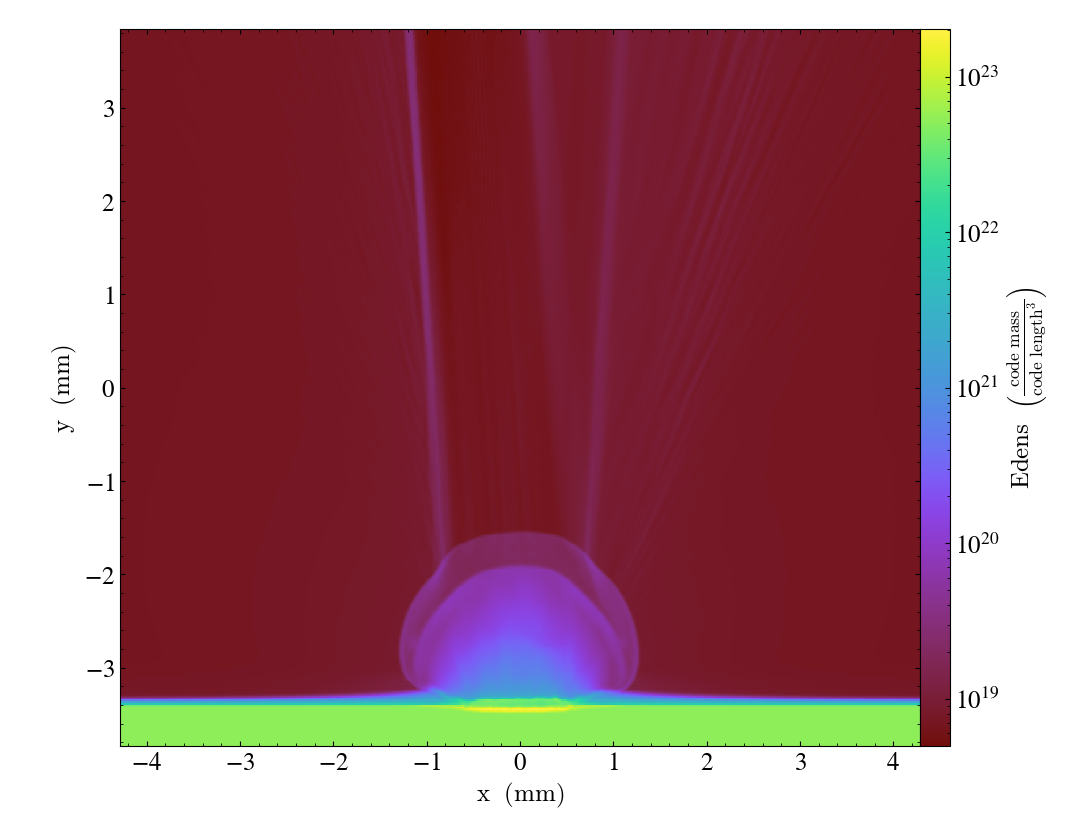

In [7]:
edens = yt.SlicePlot(ds, "z", "edens",center=[0.0, 0.34, 0.0]).zoom(1.4)
edens


yt : [INFO     ] 2024-08-05 21:08:01,995 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:01,996 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:01,998 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:01,999 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:02,000 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800


magx at [-0.6  0.7  0. ] code_length: [150002.10106202] code_magnetic



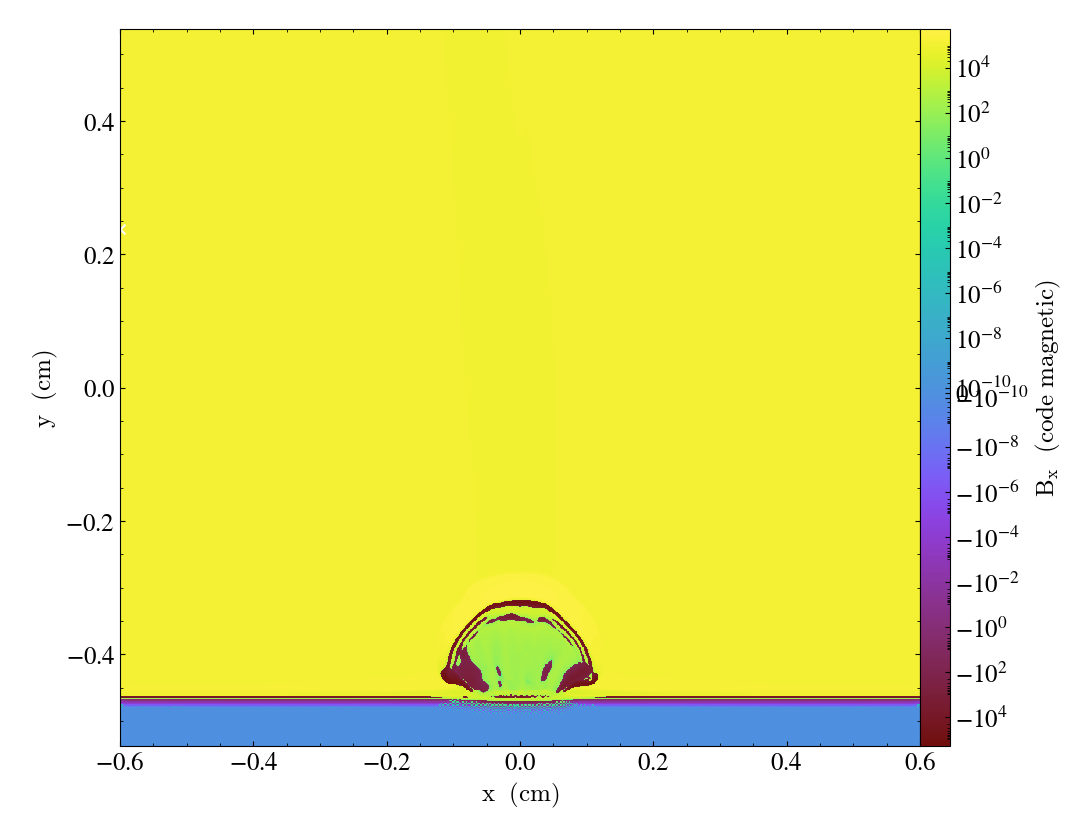

6928339.478590042


In [8]:
Bx_0 = pull_value_at_coord(background_pt,'magx',ds)

v_alfven = Bx_0.value[0]/np.sqrt(4*np.pi*rho_0.value[0])
print(v_alfven)

Text(0, 0.5, 'Number Density [$cm^{-3}$]')

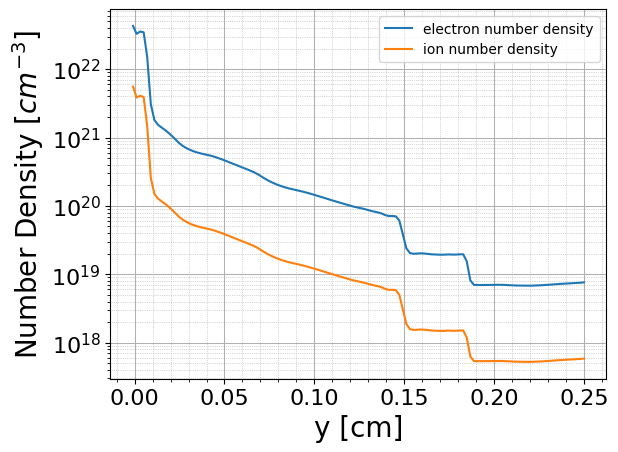

In [9]:
# Take a lineout of the number density to find where the target ends and where the piston begins
ray = ds.ray((0, 0.00, 0), (0, .25, 0))
y = np.array(ray[('flash','y')])
idens = np.array(ray[('flash','idens')])

edens = np.array(ray[('flash','edens')])
plt.semilogy(y, edens, label='electron number density')
plt.semilogy(y, idens, label='ion number density')
plt.legend()

from transform import pretty_plot
pretty_plot()


plt.xlabel('y [cm]')
plt.ylabel(r'Number Density [$cm^{-3}$]')
# based on this plot, it looks like the piston begins at y = 0.01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mach number is between 3.3306627511250992 and 15.479016366491676


Text(0.5, 1.0, 'Velocity distribution of piston')

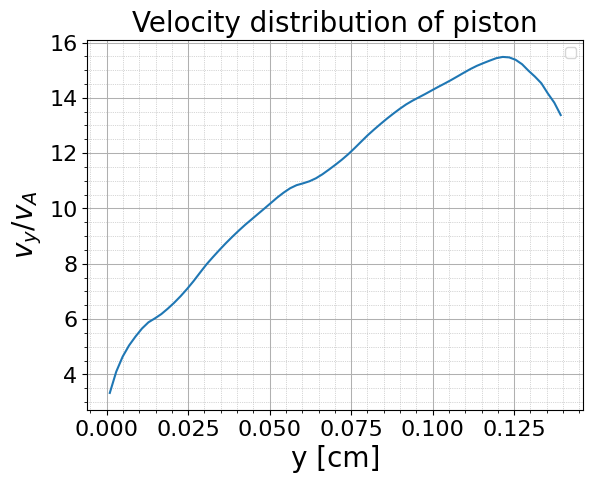

In [10]:
piston_ray = ds.ray((0, 0.01, 0), (0, .15, 0))
vely = np.array(piston_ray[('flash','vely')])
piston = np.array(piston_ray[('flash','y')])-0.01

plt.plot(piston, vely/v_alfven)
pretty_plot()
plt.legend()


mach_number_max = np.max(vely)/v_alfven
mach_number_min = np.min(vely)/v_alfven


print(f"mach number is between {mach_number_min} and {mach_number_max}")

plt.xlabel('y [cm]')
plt.ylabel(r'$v_y/v_A$')

plt.title('Velocity distribution of piston')
# plt.hlines(v_alfven, 0, 0.15, label='Alfven speed')

yt : [INFO     ] 2024-08-05 21:08:04,078 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:04,079 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:04,082 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:04,082 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:04,084 Making a fixed resolution buffer of (('flash', 'tion')) 800 by 800


tion at [-0.6  0.7  0. ] code_length: [329729.16908928] code_temperature



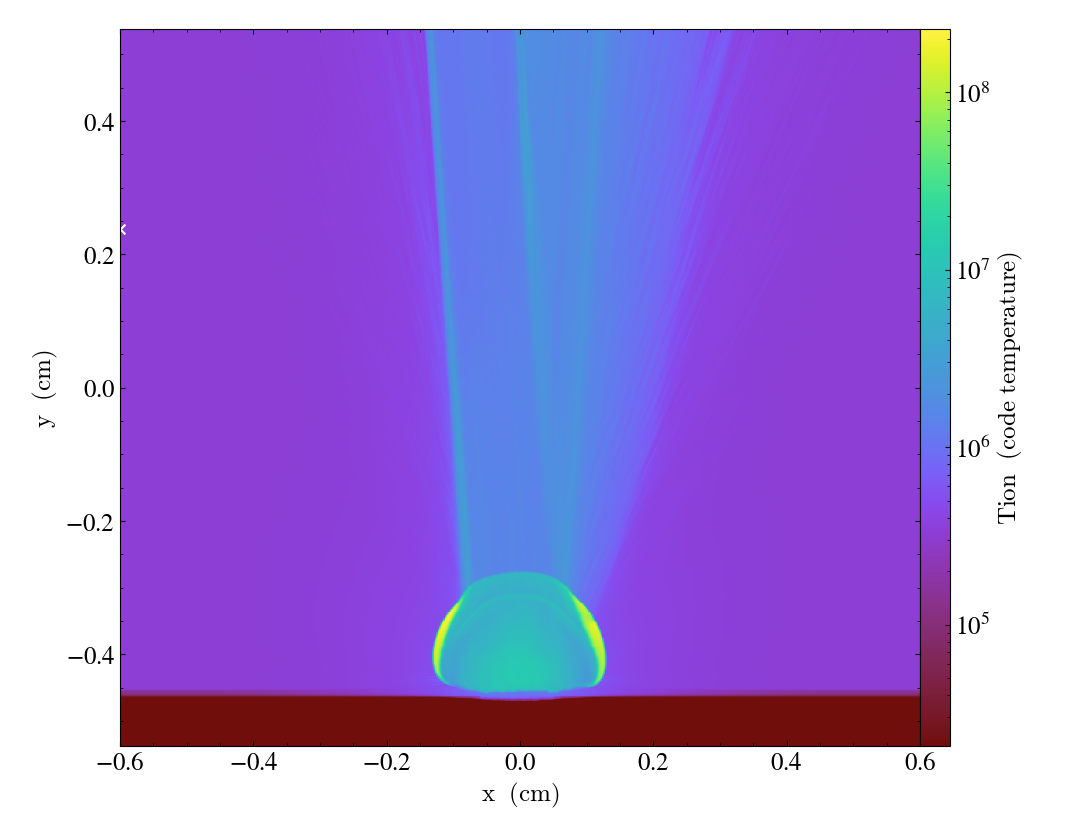

yt : [INFO     ] 2024-08-05 21:08:04,582 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:04,582 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:04,585 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 21:08:04,585 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 21:08:04,586 Making a fixed resolution buffer of (('flash', 'tele')) 800 by 800


tele at [-0.6  0.7  0. ] code_length: [325791.69873768] code_temperature



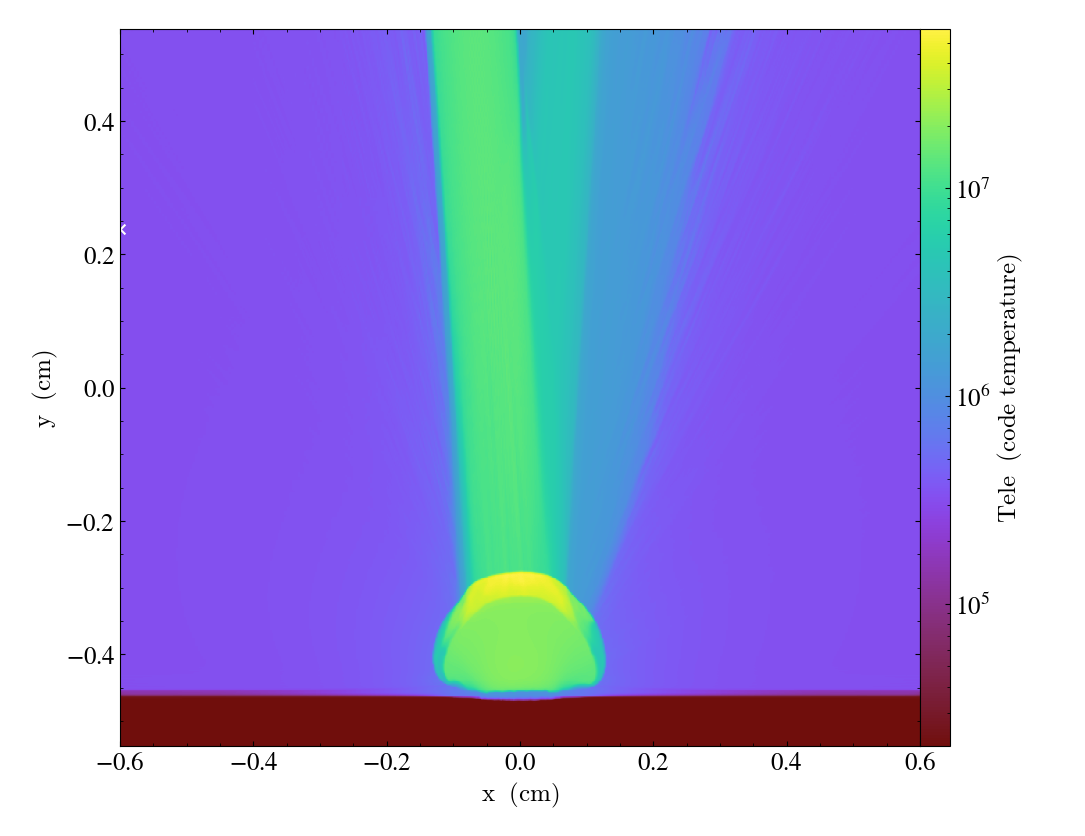

In [11]:
Ti_0 = pull_value_at_coord(background_pt,'tion',ds)

Te_0 = pull_value_at_coord(background_pt,'tele',ds)

## Now, start making (throwing) fits!

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 92
    # data points      = 71
    # variables        = 3
    chi-square         = 4330.76305
    reduced chi-square = 63.6876919
    Akaike info crit   = 297.868160
    Bayesian info crit = 304.656199
    R-squared          = 0.98028895
[[Variables]]
    A:      231.784063 +/- 4.58362341 (1.98%) (init = 0.1)
    alpha:  41.6966825 +/- 1.62092120 (3.89%) (init = 10)
    C:      2.58334536 +/- 1.61953269 (62.69%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, C) = +0.6941
    C(A, alpha) = +0.4938


Text(0.5, 1.0, 'exponential fit of density profile')

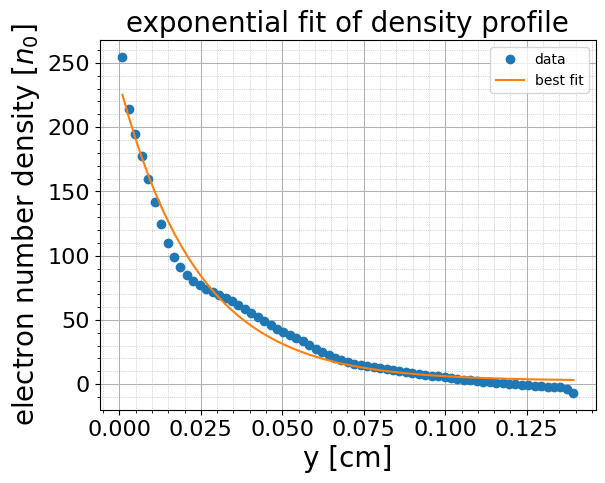

In [12]:
edens = np.array(piston_ray[('flash','edens')]-piston_ray[('flash','edens')][-10])/ne_0.value

from lmfit import Model

def exponential(y, A, alpha, C):
    return A * np.exp(-alpha * y) + C

# Create a model
exp_model = Model(exponential)

# Initial guess for the parameters
params = exp_model.make_params(A=0.1, alpha=10.0, C=0.0)

# Perform the fit
result = exp_model.fit(edens, params, y=piston)

print(result.fit_report())

# Plot the data and the fitted curve
result.plot_fit()
plt.ylabel('electron number density [$n_0$]')
plt.xlabel('y [cm]')
pretty_plot()
plt.title('exponential fit of density profile')

coefficients for the polynomial fit: [-1.02394519e-18  2.69477007e-15 -2.75782383e-12  1.32172166e-09
 -2.40177818e-07 -3.19902815e-05  2.07222787e-02 -3.39528540e+00
  2.67283718e+02] 

(-1.0239e-18)*x1^8 + (2.6948e-15)*x1^7 + (-2.7578e-12)*x1^6 + (1.3217e-09)*x1^5 + (-2.4018e-07)*x1^4 + (-3.1990e-05)*x1^3 + (2.0722e-02)*x1^2 + (-3.3953e+00)*x1^1 + (2.6728e+02)*x1^0


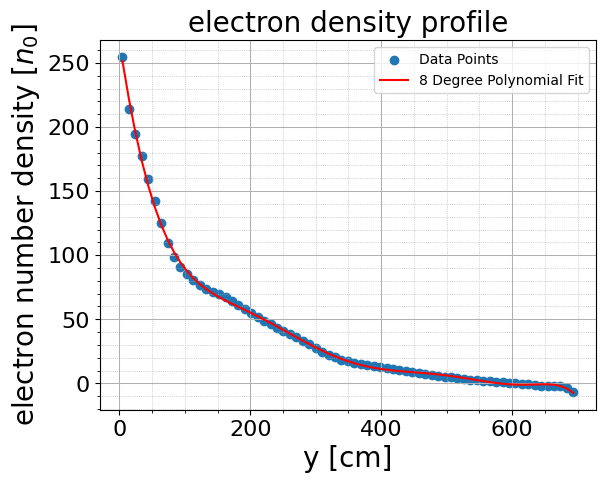

roots at [-245.75705415  581.35395715]


In [13]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 8
c_omega_pe_osiris = 4.9787e+03
piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston*c_omega_pe_osiris
field_ray = np.array(piston_ray[('flash','edens')]-piston_ray[('flash','edens')][-10])/ne_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))



plt.ylabel('electron number density [$n_0$]')
plt.xlabel('y [cm]')
plt.title('electron density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)

# Filter out the complex roots and keep only the real roots
real_zero_points = zero_points[np.isreal(zero_points)].real

print(f'roots at {real_zero_points}')

coefficients for the polynomial fit: [-6.99854100e-19  1.84149827e-15 -1.88468899e-12  9.03881144e-10
 -1.64911641e-07 -2.14648194e-05  1.40604048e-02 -2.30670626e+00
  1.81637678e+02] 

(-6.9985e-19)*x1^8 + (1.8415e-15)*x1^7 + (-1.8847e-12)*x1^6 + (9.0388e-10)*x1^5 + (-1.6491e-07)*x1^4 + (-2.1465e-05)*x1^3 + (1.4060e-02)*x1^2 + (-2.3067e+00)*x1^1 + (1.8164e+02)*x1^0


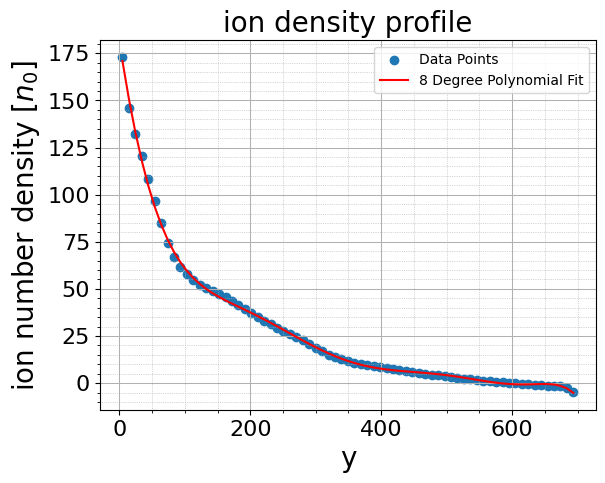

roots at [-245.00366817  581.35186083]


In [14]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 8

piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston*c_omega_pe_osiris
field_ray = np.array(piston_ray[('flash','idens')]-piston_ray[('flash','idens')][-10])/ni_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))



plt.ylabel('ion number density [$n_0$]')
plt.title('ion density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)

# Filter out the complex roots and keep only the real roots
real_zero_points = zero_points[np.isreal(zero_points)].real

print(f'roots at {real_zero_points}')

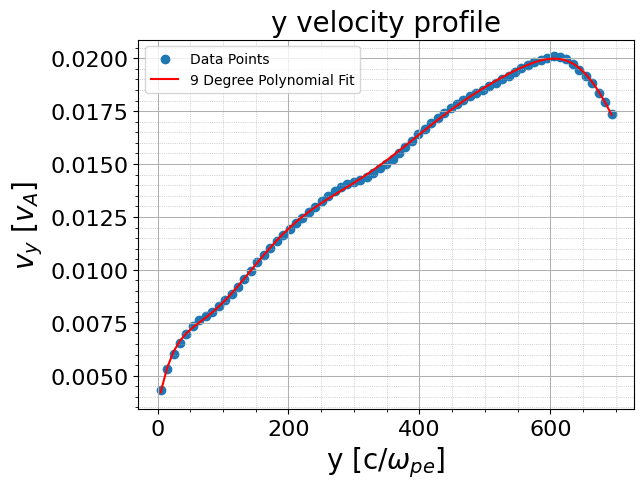

(4.7382e-25)*x1^9 + (-1.6009e-21)*x1^8 + (2.2801e-18)*x1^7 + (-1.7782e-15)*x1^6 + (8.2446e-13)*x1^5 + (-2.3064e-10)*x1^4 + (3.7745e-08)*x1^3 + (-3.3541e-06)*x1^2 + (1.7179e-04)*x1^1 + (3.4661e-03)*x1^0


In [15]:
degree = 9
alfven_speed_osiris = 0.001298
vely = np.array(piston_ray[('flash','vely')])/v_alfven*alfven_speed_osiris
coefficients = np.polyfit(piston, vely, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, vely, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('$v_y$ [$v_A$]')
pretty_plot()

plt.title('y velocity profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

/home/david/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/tmp/ipykernel_10404/1988528214.py:4: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(piston, tion, degree)


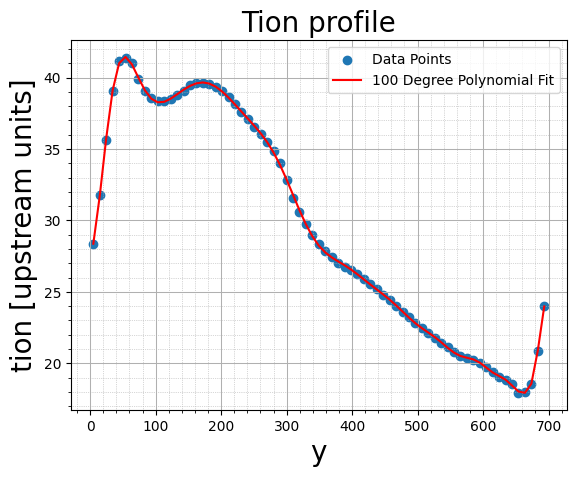

In [16]:
tion = np.array(piston_ray[('flash','tion')])/Ti_0.value

degree = 100
coefficients = np.polyfit(piston, tion, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tion, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tion [upstream units]')
pretty_plot()

plt.title('Tion profile')
plt.legend()
plt.show()

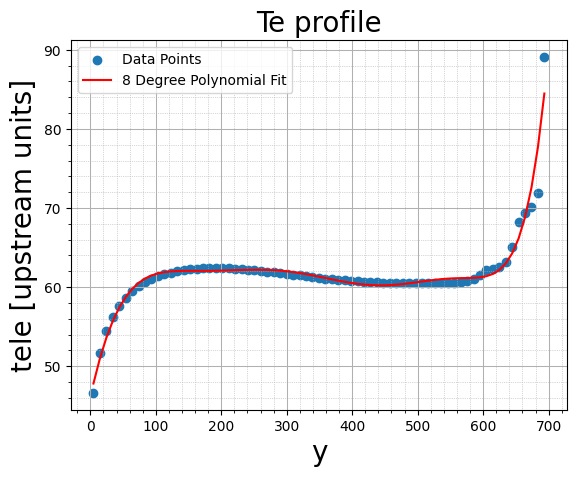

In [17]:
tele = np.array(piston_ray[('flash','tele')])/Te_0.value

degree = 8
coefficients = np.polyfit(piston, tele, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tele, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tele [upstream units]')
pretty_plot()

plt.title('Te profile')
plt.legend()
plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 7
    # variables        = 4
    chi-square         = 2.8210e-04
    reduced chi-square = 9.4034e-05
    Akaike info crit   = -62.8340656
    Bayesian info crit = -63.0504250
    R-squared          = 0.76273153
[[Variables]]
    A:      0.03220676 +/- 0.01042020 (32.35%) (init = 0.01)
    alpha:  151095.210 +/- 126568.335 (83.77%) (init = 1000)
    C:     -0.00162131 +/- 0.00642786 (396.46%) (init = 0)
    y_0:    0.00516634 +/- 6.0852e-04 (11.78%) (init = 0.004)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, C) = +0.6268
    C(A, C)     = -0.4678


Text(0.5, 1.0, 'gaussian fit of b field profile on left side of piston')

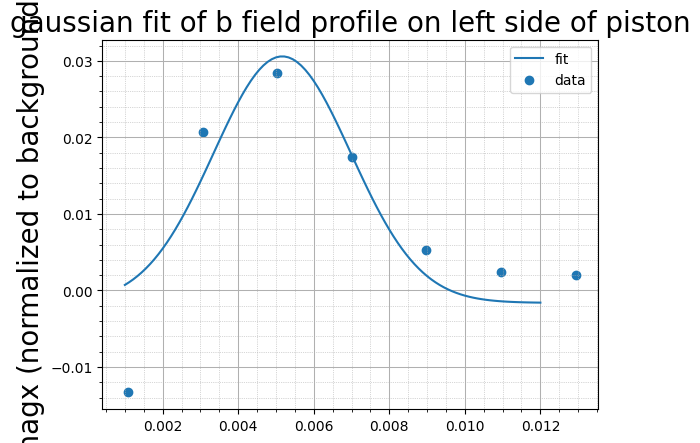

In [18]:
ray = ds.ray((0, 0.001, 0), (0, .012, 0))
magx = np.array(ray[('flash','magx')])/Bx_0.value
y = np.array(ray[('flash','y')])

def gaussian(y, A, alpha, C, y_0):
    return A * np.exp(-alpha * (y-y_0)**2) + C

# Create a model
gaussian_model = Model(gaussian)

# Initial guess for the parameters
params = gaussian_model.make_params(A=.01, alpha=1000.0, C=0.0, y_0=0.004)

# Perform the fit
result = gaussian_model.fit(magx, params, y=y)

print(result.fit_report())

# Plot the data and the fitted curve
y_smooth = np.linspace(0.001, 0.012, 100)
plt.plot(y_smooth, result.eval(y=y_smooth), label='fit')
plt.scatter(y, magx, label='data')
plt.ylabel('magx (normalized to background)')
plt.legend()
pretty_plot()
plt.title('gaussian fit of b field profile on left side of piston')

/tmp/ipykernel_10404/1170841948.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magx, degree)


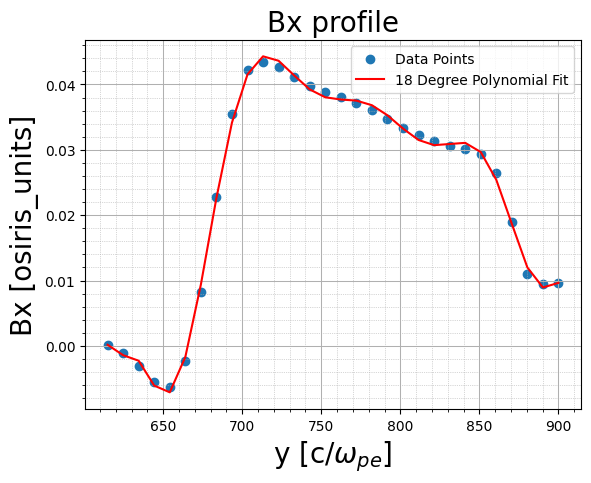

(2.0789e-45)*x1^18 + (-1.1519e-41)*x1^17 + (2.3476e-38)*x1^16 + (-1.6868e-35)*x1^15 + (-7.203e-33)*x1^14 + (1.2523e-29)*x1^13 + (5.4422e-27)*x1^12 + (-8.3254e-24)*x1^11 + (-5.6536e-21)*x1^10 + (5.0206e-18)*x1^9 + (5.298e-15)*x1^8 + (-3.038e-12)*x1^7 + (-4.2779e-09)*x1^6 + (2.6489e-06)*x1^5 + (2.6352e-03)*x1^4 + (-3.6146e+00)*x1^3 + (1.7405e+03)*x1^2 + (-4.0102e+05)*x1^1 + (3.7203e+07)*x1^0


In [19]:
degree = 18
Bx_0_osiris = 0.013
ray = ds.ray((0, 0.133, 0), (0, .19, 0))
y = (np.array(ray['flash','y'])-0.01)*c_omega_pe_osiris
magx = np.array(ray[('flash','magx')])/Bx_0.value*Bx_0_osiris
coefficients = np.polyfit(y, magx, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(y)

# Plot the original data points
plt.scatter(y, magx, label='Data Points')

# Plot the polynomial fit
plt.plot(y, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('Bx [osiris_units]')
pretty_plot()

plt.title('Bx profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

/home/david/.local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_10404/3026228862.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magy, degree)


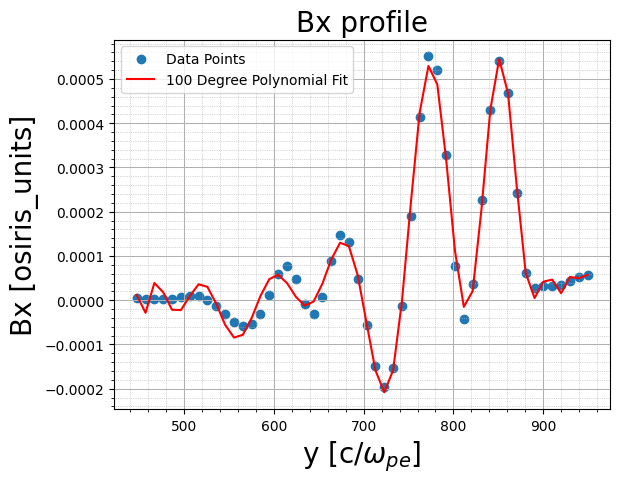

(-0.e+00)*x1^100 + (0.e+00)*x1^99 + (0.e+00)*x1^98 + (0.e+00)*x1^97 + (-0.e+00)*x1^96 + (-0.e+00)*x1^95 + (0.e+00)*x1^94 + (0.e+00)*x1^93 + (0.e+00)*x1^92 + (0.e+00)*x1^91 + (-0.e+00)*x1^90 + (0.e+00)*x1^89 + (0.e+00)*x1^88 + (0.e+00)*x1^87 + (-0.e+00)*x1^86 + (0.e+00)*x1^85 + (0.e+00)*x1^84 + (0.e+00)*x1^83 + (-0.e+00)*x1^82 + (-0.e+00)*x1^81 + (-0.e+00)*x1^80 + (0.e+00)*x1^79 + (0.e+00)*x1^78 + (0.e+00)*x1^77 + (-0.e+00)*x1^76 + (-0.e+00)*x1^75 + (-0.e+00)*x1^74 + (-0.e+00)*x1^73 + (-0.e+00)*x1^72 + (0.e+00)*x1^71 + (-0.e+00)*x1^70 + (-0.e+00)*x1^69 + (-0.e+00)*x1^68 + (-0.e+00)*x1^67 + (0.e+00)*x1^66 + (0.e+00)*x1^65 + (0.e+00)*x1^64 + (-0.e+00)*x1^63 + (0.e+00)*x1^62 + (-0.e+00)*x1^61 + (0.e+00)*x1^60 + (-0.e+00)*x1^59 + (0.e+00)*x1^58 + (-0.e+00)*x1^57 + (-0.e+00)*x1^56 + (-0.e+00)*x1^55 + (-0.e+00)*x1^54 + (0.e+00)*x1^53 + (0.e+00)*x1^52 + (-6.993e-145)*x1^51 + (1.7688e-141)*x1^50 + (-3.3256e-139)*x1^49 + (-1.2178e-135)*x1^48 + (-6.172e-133)*x1^47 + (3.5111e-130)*x1^46 + (8.4984e

In [20]:
degree = 100
Bx_0_osiris = 0.013
ray = ds.ray((0, 0.10, 0), (0, .20, 0))
y = (np.array(ray['flash','y'])-0.01)*c_omega_pe_osiris
magy = np.array(ray[('flash','magy')])/Bx_0.value*Bx_0_osiris
coefficients = np.polyfit(y, magy, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(y)

# Plot the original data points
plt.scatter(y, magy, label='Data Points')

# Plot the polynomial fit
plt.plot(y, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('Bx [osiris_units]')
pretty_plot()

plt.title('Bx profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

/tmp/ipykernel_10404/4096097308.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magz, degree)


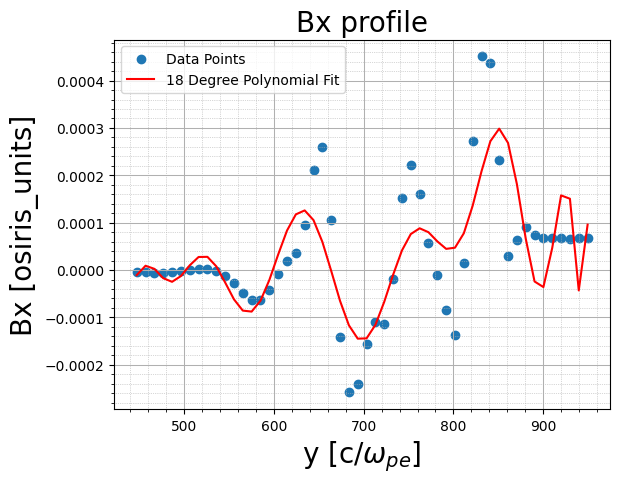

(1.9638e-47)*x1^18 + (-1.3082e-43)*x1^17 + (3.5205e-40)*x1^16 + (-4.4716e-37)*x1^15 + (1.6045e-34)*x1^14 + (2.3545e-31)*x1^13 + (-2.1449e-28)*x1^12 + (-1.2085e-25)*x1^11 + (2.0288e-22)*x1^10 + (4.0655e-20)*x1^9 + (-1.7994e-16)*x1^8 + (5.0194e-14)*x1^7 + (1.1668e-10)*x1^6 + (-1.4572e-07)*x1^5 + (8.5211e-05)*x1^4 + (-2.9970e-02)*x1^3 + (6.5077e+00)*x1^2 + (-8.1025e+02)*x1^1 + (4.4526e+04)*x1^0


In [21]:
degree = 18
Bx_0_osiris = 0.013
ray = ds.ray((0, 0.10, 0), (0, .20, 0))
y = (np.array(ray['flash','y'])-0.01)*c_omega_pe_osiris
magz = np.array(ray[('flash','magz')])/Bx_0.value*Bx_0_osiris
coefficients = np.polyfit(y, magz, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(y)

# Plot the original data points
plt.scatter(y, magz, label='Data Points')

# Plot the polynomial fit
plt.plot(y, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('Bx [osiris_units]')
pretty_plot()

plt.title('Bx profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

In [22]:
def make_Ex(field, data):
    Ex = data['flash','velz']*data["flash","magy"]-data["flash","vely"]*data["flash","magz"]
    return Ex

def make_Ey(field, data):
    Ey = data['flash','velx']*data["flash","magz"]-data["flash","velz"]*data["flash","magx"]
    return Ey

def make_Ez(field, data):
    Ez = data['flash','vely']*data["flash","magx"]-data["flash","velx"]*data["flash","magy"]
    return Ez

ds.add_field(("flash", "Ex"), function=make_Ex, units="code_magnetic*code_length/code_time",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "Ey"), function=make_Ey, units="code_magnetic*code_length/code_time",sampling_type="cell")
ds.add_field(("flash", "Ez"), function=make_Ez, units="code_magnetic*code_length/code_time",sampling_type="cell")

yt : [INFO     ] 2024-08-05 19:23:43,158 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 19:23:43,159 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 19:23:43,161 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-05 19:23:43,161 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-05 19:23:43,162 Making a fixed resolution buffer of (('flash', 'Ez')) 800 by 800



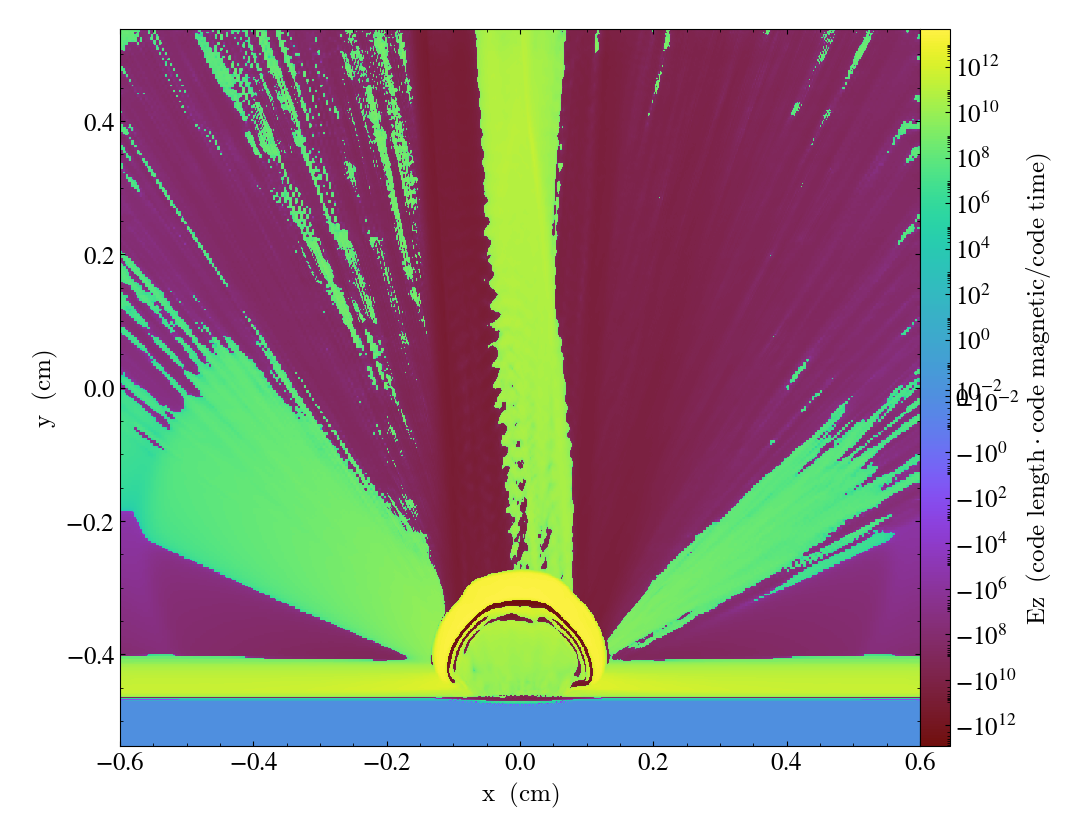

In [23]:
yt.SlicePlot(ds, 'z', ('flash', 'Ez')).show()